# Cat and Dog 

### Step 1: Import useful libraries 

In [4]:
import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
import pandas as pd 
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import random

### Step 2: Limit the image size

In [5]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3


### Step 3: Import training set and include image information in dataframe

In [6]:
filenames = os.listdir("C:/Users/vince/MLW/Dog_Cat/train/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1) #Dog as 1
    else:
        categories.append(0) #Cat as o

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [7]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [8]:
df.tail()

,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


<AxesSubplot:>

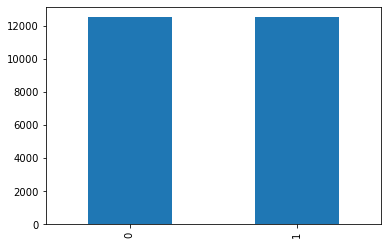

In [9]:
df['category'].value_counts().plot.bar()
# Count the total number of images
# 12500 cats and 12500 dogs in train set


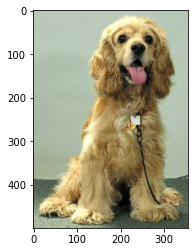

In [12]:
# randomly select one image to print out
sample = random.choice(filenames)
image = load_img("C:/Users/vince/MLW/Dog_Cat/train/train/"+sample)
plt.imshow(image)

### Step 4: Building neural network model with Batchnormalization and Dropout to prevent overfitting 

In [9]:
model = tf.keras.models.Sequential([
    #Set the image size to 128x128 with 3 bytes color
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)), #format of 128, convenlution layer 16, (3,3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2), #(2,2)maxpooling,new image size is 1/4 of old one
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    #  use Dropout(0.2) to decrease the overfitting
    tf.keras.layers.Flatten(), # Flatten the results into a one dimension data 
    # 126 neuron hidden layer
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')   
])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

### Step 5: Split training set and testing set, building training generator and testing generator with image augmentation

In [12]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=32

In [13]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "C:/Users/vince/MLW/Dog_Cat/train/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [14]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:/Users/vince/MLW/Dog_Cat/train/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


### Step 6: Training model with training set

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
625/625 [==============================] - 711s 1s/step - loss: 0.6654 - accuracy: 0.6515 - val_loss: 0.8050 - val_accuracy: 0.5739
Epoch 2/50
625/625 [==============================] - 734s 1s/step - loss: 0.4929 - accuracy: 0.7616 - val_loss: 0.5118 - val_accuracy: 0.7786
Epoch 3/50
625/625 [==============================] - 724s 1s/step - loss: 0.4324 - accuracy: 0.8012 - val_loss: 0.3866 - val_accuracy: 0.8229
Epoch 4/50
625/625 [==============================] - 728s 1s/step - loss: 0.3966 - accuracy: 0.8198 - val_loss: 0.7547 - val_accuracy: 0.7093
Epoch 5/50
625/625 [==============================] - 725s 1s/step - loss: 0.3707 - accuracy: 0.8349 - val_loss: 0.7255 - val_accuracy: 0.6621
Epoch 6/50
625/625 [==============================] - 719s 1s/step - loss: 0.3497 - accuracy: 0.8464 - val_loss: 0.3948 - val_accuracy: 0.8359
Epoch 7/50
625/625 [==============================] - 722s 1s/step

KeyError: 'acc'

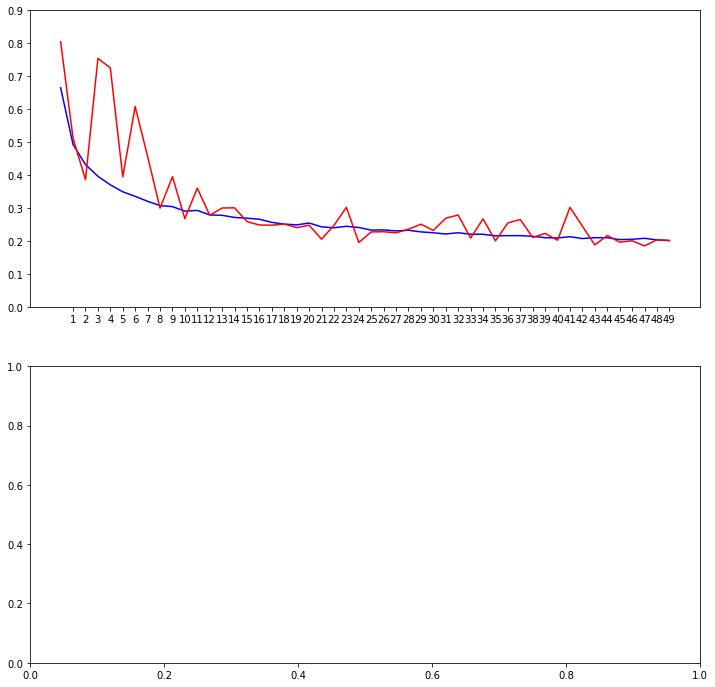

In [15]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    
    
)



### Step 7: Plot training accuracy and loss

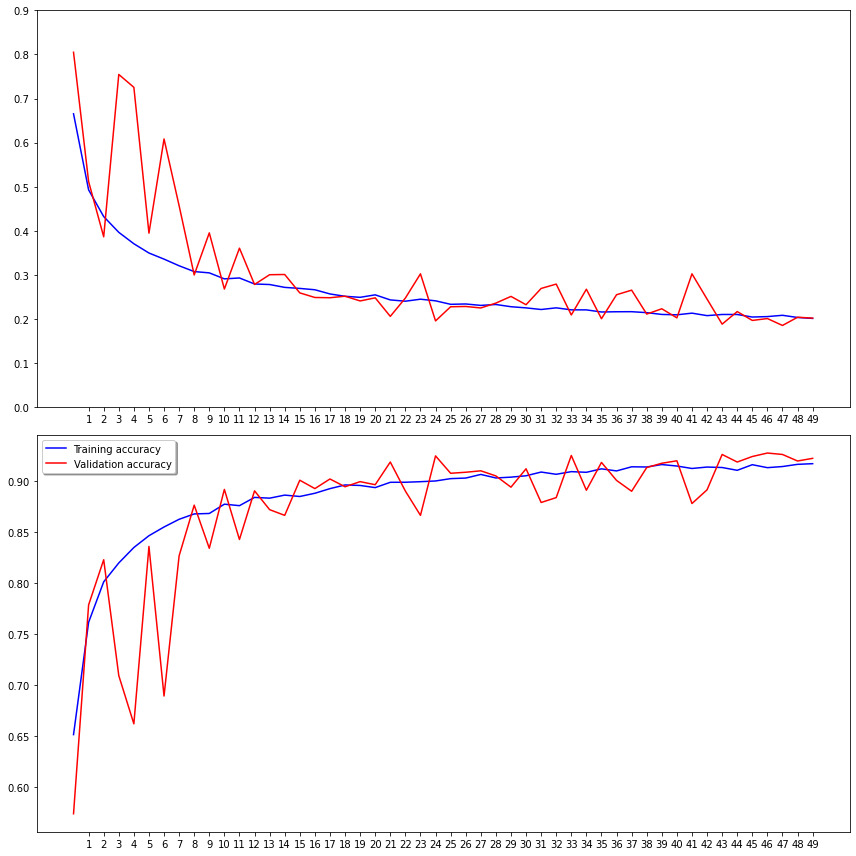

In [17]:
model.save_weights("model.h5")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()